In [1]:
import geopandas as gpd

gdf = gpd.read_file('/home/dipp/Github/Master-Thesis-dipp/GEO_map_V2/Tutorial/World_Countries_(Generalized)/World_Countries__Generalized_.shp')

gdf.head()

FID         COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Leng  SHAPE_Area  \
0    1     Afghanistan  AF    Afghanistan      AF   50.803210   62.566714   
1    2         Albania  AL        Albania      AL    9.625038    3.073540   
2    3         Algeria  DZ        Algeria      DZ   70.540082  213.513461   
3    4  American Samoa  AS  United States      US    0.600124    0.013720   
4    5         Andorra  AD        Andorra      AD    0.937352    0.055585   

                                            geometry  
0  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  
1  POLYGON ((19.57083 41.68527, 19.58195 41.69569...  
2  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...  
3  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
4  POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...

In [2]:
url = 'https://raw.githubusercontent.com/MinnPost/simple-map-d3/master/example-data/world-population.geo.json'

world_gdf = gpd.read_file(url)

world_gdf.head()

NAME ISO_3_CODE ISO_2_CODE    AREA       NAME_1   POP2005  \
0  Afghanistan        AFG         AF   65209  Afghanistan  25067407   
1      Albania        ALB         AL    2740      Albania   3153731   
2      Algeria        DZA         DZ  238174      Algeria  32854159   
3      Andorra        AND         AD       0      Andorra     73483   
4       Angola        AGO         AO  124670       Angola  16095214   

               REGION GMI_CNTRY      NAME_12  \
0                Asia       AFG  Afghanistan   
1              Europe       ALB      Albania   
2         NorthAfrica       DZA      Algeria   
3              Europe       AND      Andorra   
4  Sub Saharan Africa       AGO       Angola   

                                            geometry  
0  POLYGON ((65.62730 37.33320, 65.64693 37.45888...  
1  POLYGON ((19.39732 42.31707, 19.46971 42.39999...  
2  POLYGON ((-1.25389 32.21471, -1.25000 32.32693...  
3  POLYGON ((1.71097 42.47350, 1.53333 42.43610, ...  
4  MULTIPOLYGON (((12.01007 -5.02062, 12.16639 -4...

In [3]:
gdf.to_file('/home/dipp/Github/Master-Thesis-dipp/GEO_map_V2/Tutorial/World_Countries__Generalized.geojson', driver='GeoJSON')

In [4]:
world_gdf.shape

(211, 10)

In [5]:
type(world_gdf)

geopandas.geodataframe.GeoDataFrame

In [6]:
world_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        211 non-null    object  
 1   ISO_3_CODE  211 non-null    object  
 2   ISO_2_CODE  211 non-null    object  
 3   AREA        211 non-null    object  
 4   NAME_1      211 non-null    object  
 5   POP2005     211 non-null    object  
 6   REGION      211 non-null    object  
 7   GMI_CNTRY   211 non-null    object  
 8   NAME_12     211 non-null    object  
 9   geometry    211 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 16.6+ KB


In [7]:
world_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
world_gdf.columns

Index(['NAME', 'ISO_3_CODE', 'ISO_2_CODE', 'AREA', 'NAME_1', 'POP2005',
       'REGION', 'GMI_CNTRY', 'NAME_12', 'geometry'],
      dtype='object')

In [9]:
world_gdf.POP2005

0      25067407
1       3153731
2      32854159
3         73483
4      16095214
         ...   
206    21095679
207     9863026
208    58740547
209    11478317
210    13119679
Name: POP2005, Length: 211, dtype: object

In [10]:
world_gdf['POP2005']

0      25067407
1       3153731
2      32854159
3         73483
4      16095214
         ...   
206    21095679
207     9863026
208    58740547
209    11478317
210    13119679
Name: POP2005, Length: 211, dtype: object

In [11]:
world_gdf[world_gdf['NAME'] =='China']['POP2005']

37    1312978855
Name: POP2005, dtype: object

In [12]:
world_gdf['boundary'] = world_gdf.boundary
world_gdf['boundary']

0      LINESTRING (65.62730 37.33320, 65.64693 37.458...
1      LINESTRING (19.39732 42.31707, 19.46971 42.399...
2      LINESTRING (-1.25389 32.21471, -1.25000 32.326...
3      LINESTRING (1.71097 42.47350, 1.53333 42.43610...
4      MULTILINESTRING ((12.01007 -5.02062, 12.16639 ...
                             ...                        
206    LINESTRING (51.99915 18.99888, 51.90415 18.545...
207    LINESTRING (20.07272 42.55844, 20.02896 42.721...
208    LINESTRING (31.27745 2.17820, 31.27972 2.17667...
209    LINESTRING (28.76191 -16.53440, 28.75976 -16.5...
210    LINESTRING (28.75976 -16.53767, 28.76191 -16.5...
Name: boundary, Length: 211, dtype: geometry

In [13]:
world_gdf['centroid'] = world_gdf.centroid
world_gdf['centroid']

/tmp/ipykernel_61826/1229177432.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_gdf['centroid'] = world_gdf.centroid


0       POINT (66.02695 33.83959)
1       POINT (20.06466 41.14350)
2        POINT (2.63167 28.16258)
3        POINT (1.58730 42.54147)
4      POINT (17.54495 -12.29359)
                  ...            
206     POINT (47.59134 15.77731)
207     POINT (20.80471 44.02662)
208     POINT (23.65690 -2.87535)
209    POINT (27.79925 -13.45302)
210    POINT (29.87045 -19.00312)
Name: centroid, Length: 211, dtype: geometry

In [14]:
world_gdf['centroid'] = world_gdf.to_crs(3857).centroid
world_gdf['centroid']

0       POINT (7354486.896 4017736.603)
1       POINT (2233478.912 5035365.825)
2        POINT (292615.786 3302567.699)
3        POINT (176697.417 5242446.985)
4      POINT (1953402.929 -1385745.990)
                     ...               
206     POINT (5299033.934 1780605.357)
207     POINT (2315093.566 5473720.440)
208     POINT (2633886.156 -323258.251)
209    POINT (3092719.338 -1515282.005)
210    POINT (3325201.834 -2158042.585)
Name: centroid, Length: 211, dtype: geometry

In [15]:
world_gdf['area']=world_gdf.to_crs(6933).area
world_gdf['area']

0      6.419639e+11
1      2.875576e+10
2      2.318240e+12
3      4.702513e+08
4      1.247851e+12
           ...     
206    3.990873e+11
207    8.856234e+10
208    2.325712e+12
209    7.521495e+11
210    3.892279e+11
Name: area, Length: 211, dtype: float64

In [16]:
world_gdf['pop_density'] = world_gdf['POP2005'].astype(float) /world_gdf['AREA'].astype(float) * 10
world_gdf.head()

NAME ISO_3_CODE ISO_2_CODE    AREA       NAME_1   POP2005  \
0  Afghanistan        AFG         AF   65209  Afghanistan  25067407   
1      Albania        ALB         AL    2740      Albania   3153731   
2      Algeria        DZA         DZ  238174      Algeria  32854159   
3      Andorra        AND         AD       0      Andorra     73483   
4       Angola        AGO         AO  124670       Angola  16095214   

               REGION GMI_CNTRY      NAME_12  \
0                Asia       AFG  Afghanistan   
1              Europe       ALB      Albania   
2         NorthAfrica       DZA      Algeria   
3              Europe       AND      Andorra   
4  Sub Saharan Africa       AGO       Angola   

                                            geometry  \
0  POLYGON ((65.62730 37.33320, 65.64693 37.45888...   
1  POLYGON ((19.39732 42.31707, 19.46971 42.39999...   
2  POLYGON ((-1.25389 32.21471, -1.25000 32.32693...   
3  POLYGON ((1.71097 42.47350, 1.53333 42.43610, ...   
4  MULTIPOLYGON (((12.01007 -5.02062, 12.16639 -4...   

                                            boundary  \
0  LINESTRING (65.62730 37.33320, 65.64693 37.458...   
1  LINESTRING (19.39732 42.31707, 19.46971 42.399...   
2  LINESTRING (-1.25389 32.21471, -1.25000 32.326...   
3  LINESTRING (1.71097 42.47350, 1.53333 42.43610...   
4  MULTILINESTRING ((12.01007 -5.02062, 12.16639 ...   

                           centroid          area   pop_density  
0   POINT (7354486.896 4017736.603)  6.419639e+11  3.844164e+03  
1   POINT (2233478.912 5035365.825)  2.875576e+10  1.150997e+04  
2    POINT (292615.786 3302567.699)  2.318240e+12  1.379418e+03  
3    POINT (176697.417 5242446.985)  4.702513e+08           inf  
4  POINT (1953402.929 -1385745.990)  1.247851e+12  1.291025e+03

In [17]:
world_gdf.sort_values(by='pop_density', ascending=False)

NAME ISO_3_CODE ISO_2_CODE AREA  \
193  Turks and Caicos Islands        TCA         TC    0   
16                    Belgium        BEL         BE    0   
66                 Gaza Strip        PSE         PS    0   
58              Faroe Islands        FRO         FO    0   
89                Isle of Man        IMY               0   
..                        ...        ...        ...  ...   
94                  Jan Mayen        SJM         SJ    0   
99                  Kerguelen                          0   
172     St. Christopher-Nevis                          0   
177                  Svalbard                          0   
182                    Taiwan                          0   

                       NAME_1   POP2005      REGION GMI_CNTRY  \
193  Turks and Caicos Islands     24459   Caribbean       TCA   
16                    Belgium  10398049      Europe       BEL   
66                 Gaza Strip   3762005        Asia       PSE   
58              Faroe Islands     48205      Europe       FRO   
89                Isle of Man     78357      Europe       XIM   
..                        ...       ...         ...       ...   
94                  Jan Mayen         0      Europe       SJM   
99                                    0  Antarctica             
172                                   0   Caribbean             
177                  Svalbard         0      Europe       SJM   
182                    Taiwan         0        Asia       TWN   

                      NAME_12  \
193  Turks and Caicos Islands   
16                    Belgium   
66                  Palestine   
58              Faroe Islands   
89                Isle of Man   
..                        ...   
94                   Svalbard   
99                              
172                             
177                  Svalbard   
182                    Taiwan   

                                              geometry  \
193  POLYGON ((-73.66278 20.91527, -73.70612 21.026...   
16   POLYGON ((3.37065 51.37555, 3.36389 51.31360, ...   
66   POLYGON ((34.49026 31.59666, 34.55859 31.53305...   
58   MULTIPOLYGON (((-6.71806 61.93332, -6.96111 62...   
89   POLYGON ((-4.78417 54.05693, -4.71417 54.21443...   
..                                                 ...   
94   POLYGON ((-9.07167 70.80664, -9.12000 70.86304...   
99   POLYGON ((68.81693 -49.72056, 68.76053 -49.684...   
172  MULTIPOLYGON (((-62.58500 17.09170, -62.59140 ...   
177  MULTIPOLYGON (((25.03000 76.43915, 24.94139 76...   
182  POLYGON ((120.84080 21.90305, 120.75140 21.958...   

                                              boundary  \
193  LINESTRING (-73.66278 20.91527, -73.70612 21.0...   
16   LINESTRING (3.37065 51.37555, 3.36389 51.31360...   
66   LINESTRING (34.49026 31.59666, 34.55859 31.533...   
58   MULTILINESTRING ((-6.71806 61.93332, -6.96111 ...   
89   LINESTRING (-4.78417 54.05693, -4.71417 54.214...   
..                                                 ...   
94   LINESTRING (-9.07167 70.80664, -9.12000 70.863...   
99   LINESTRING (68.81693 -49.72056, 68.76053 -49.6...   
172  MULTILINESTRING ((-62.58500 17.09170, -62.5914...   
177  MULTILINESTRING ((25.03000 76.43915, 24.94139 ...   
182  LINESTRING (120.84080 21.90305, 120.75140 21.9...   

                             centroid          area  pop_density  
193  POINT (-8165608.297 2400851.689)  1.685896e+09          inf  
16     POINT (518236.723 6559151.554)  3.071866e+10          inf  
66    POINT (3826519.248 3685366.115)  3.922554e+08          inf  
58    POINT (-769491.486 8899480.399)  6.883602e+08          inf  
89    POINT (-505287.795 7212277.449)  5.770531e+08          inf  
..                                ...           ...          ...  
94   POINT (-936300.075 11408772.315)  4.345203e+08          NaN  
99   POINT (7736298.426 -6328819.523)  6.514288e+09          NaN  
172  POINT (-6979234.980 1951481.404)  2.744414e+08          NaN  
177  POINT (2076076.231 14907735.112)  6.112031e+10          N

<Axes: >

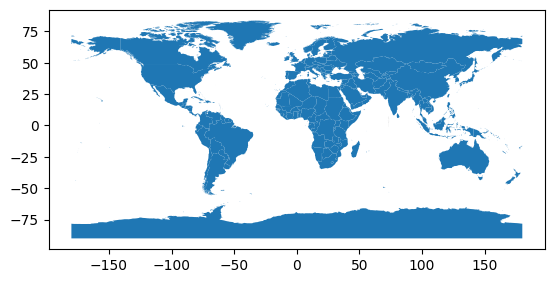

In [19]:
world_gdf.plot()

<Axes: >

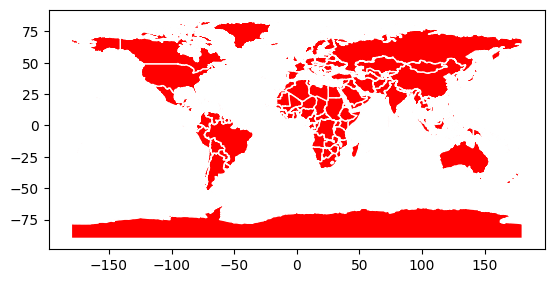

In [20]:
world_gdf.plot(color='red',edgecolor='white')

<Axes: >

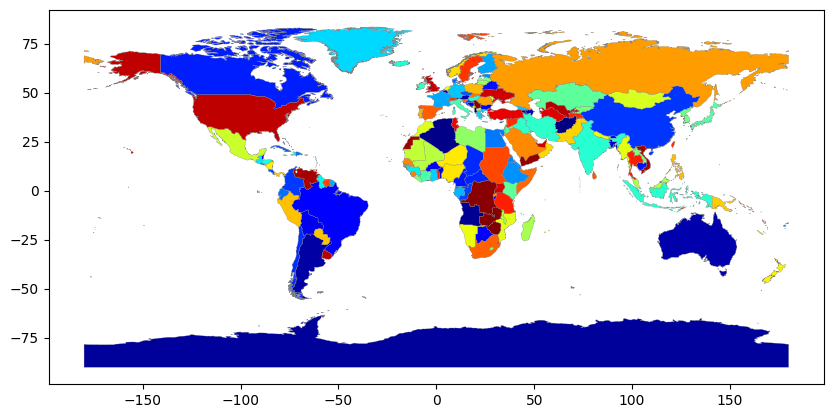

In [21]:
world_gdf.plot(cmap='jet',linewidth=0.2, edgecolor='gray',column='NAME',figsize=(10, 5))

<Axes: >

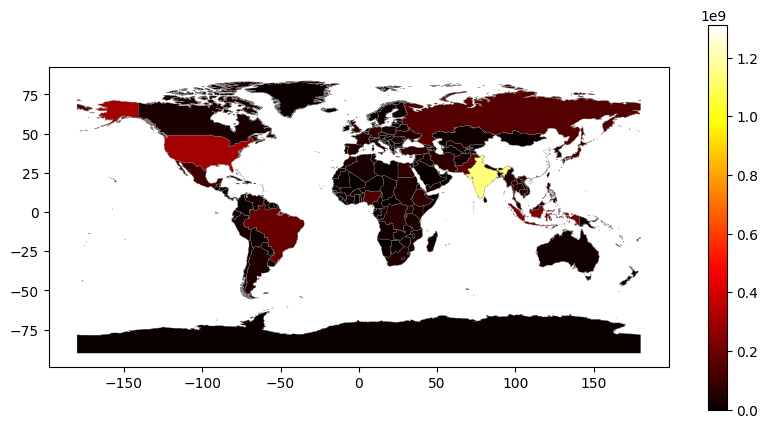

In [22]:
world_gdf['POP2005']=world_gdf['POP2005'].astype(float)

world_gdf.plot(cmap='hot',linewidth=0.2, edgecolor='gray',column='POP2005',legend=True,figsize=(10, 5))

<Axes: >

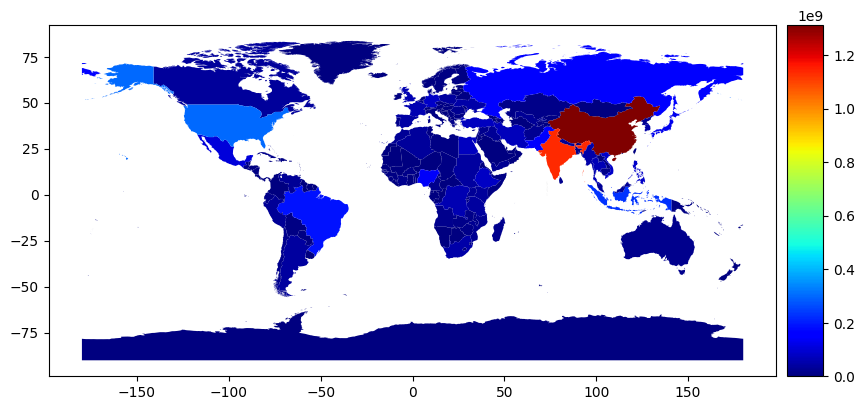

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1,figsize=(10, 5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%",pad=0.1) 
world_gdf.plot(cmap='jet',column='POP2005', ax=ax, legend=True, cax=cax)

<Axes: >

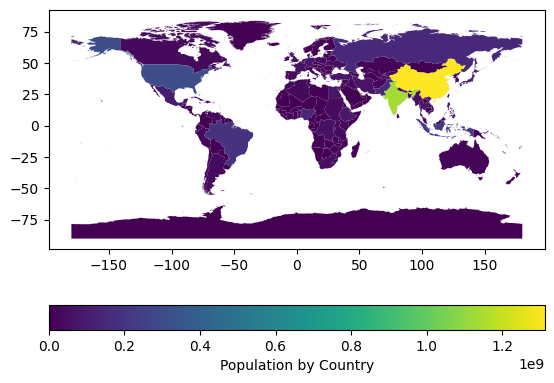

In [24]:
fig, ax = plt.subplots(1, 1)

world_gdf.plot(column='POP2005',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

<Axes: >

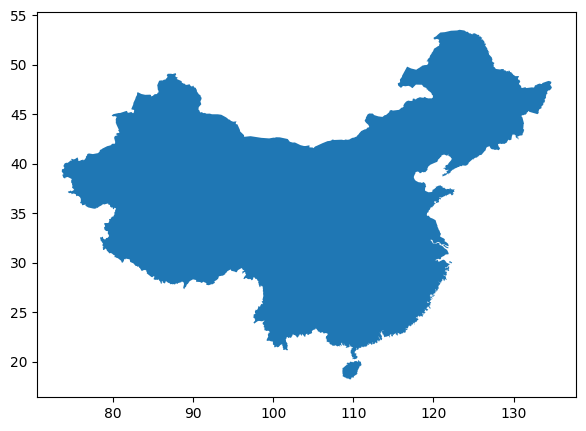

In [25]:
china_mainland = world_gdf[world_gdf['NAME'] =='China']

china_mainland.plot(figsize=(10, 5))

Text(0.5, 1.0, 'Map of China')

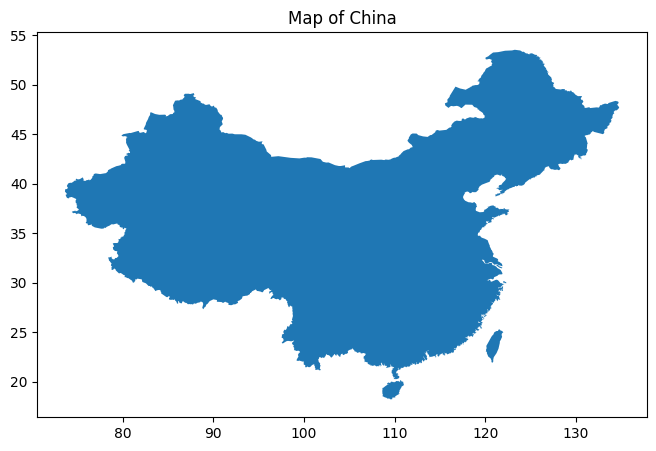

In [26]:
china_mainland = world_gdf[world_gdf['NAME'] =='China']
china_taiwan = world_gdf[world_gdf['NAME'] =='Taiwan']

fig, ax = plt.subplots(figsize=(10, 5))

china_mainland.plot(ax=ax) 
china_taiwan.plot(ax=ax)

plt.title('Map of China')

In [27]:
airports_url = 'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_10m_airports.geojson'

airports = gpd.read_file(airports_url)
airports.head()

scalerank              type         name abbrev  location gps_code  \
0          9             small     Sahnewal    LUH  terminal     VILD   
1          9               mid      Solapur    SSE  terminal     VASL   
2          9               mid  Birsa Munda    IXR  terminal     VERC   
3          9               mid        Ahwaz    AWZ  terminal     OIAW   
4          9  mid and military      Gwalior    GWL  terminal     VIGR   

  iata_code                                         wikipedia  natlscale  \
0       LUH     http://en.wikipedia.org/wiki/Sahnewal_Airport          8   
1       SSE      http://en.wikipedia.org/wiki/Solapur_Airport          8   
2       IXR  http://en.wikipedia.org/wiki/Birsa_Munda_Airport          8   
3       AWZ        http://en.wikipedia.org/wiki/Ahwaz_Airport          8   
4       GWL      http://en.wikipedia.org/wiki/Gwalior_Airport          8   

  featureclass                   geometry  
0      Airport  POINT (75.95707 30.85036)  
1      Airport  POINT (75.93306 17.62542)  
2      Airport  POINT (85.32360 23.31772)  
3      Airport  POINT (48.74711 31.34316)  
4      Airport  POINT (78.21722 26.28549)

<Axes: >

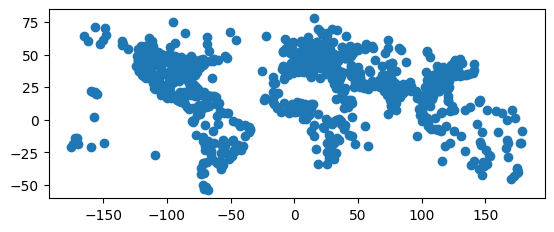

In [28]:
airports.plot()

<Axes: >

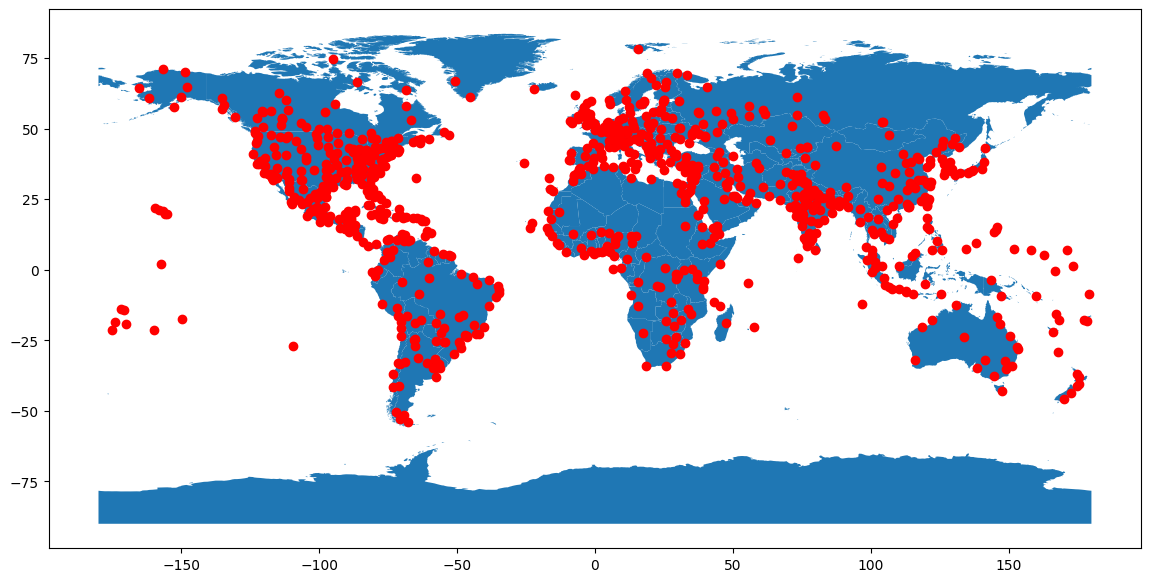

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))

world_gdf.plot(ax=ax)
airports.plot(ax=ax, color='red')

In [30]:
import pandas as pd

cities = pd.DataFrame(
    {"City": ["Tokyo", "New York", "Mexico"],
     "Population": [35676000, 19354922, 19354922],
     "Latitude": [35.6850, 40.6943, 19.4424],
     "Longitude": [139.7514, -73.9249, -99.1310],
    }
)
cities

City  Population  Latitude  Longitude
0     Tokyo    35676000   35.6850   139.7514
1  New York    19354922   40.6943   -73.9249
2    Mexico    19354922   19.4424   -99.1310

In [31]:
cities = gpd.GeoDataFrame(cities,
                          crs="EPSG:4326",  
                          geometry=gpd.points_from_xy(cities["Longitude"], cities["Latitude"]))
cities

City  Population  Latitude  Longitude                    geometry
0     Tokyo    35676000   35.6850   139.7514  POINT (139.75140 35.68500)
1  New York    19354922   40.6943   -73.9249  POINT (-73.92490 40.69430)
2    Mexico    19354922   19.4424   -99.1310  POINT (-99.13100 19.44240)

Text(0.5, 1.0, 'Big cities in the world')

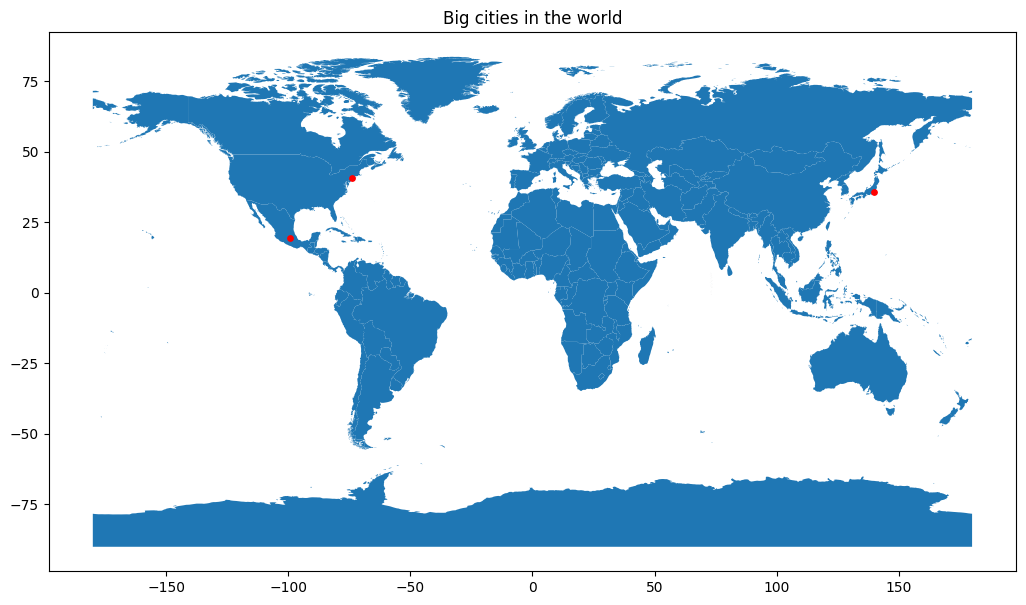

In [32]:
fig, ax = plt.subplots(figsize=(15, 7))

world_gdf.plot(ax=ax)
cities.plot(ax=ax, color='red',markersize=15, edgecolor="red")
plt.title("Big cities in the world")

In [33]:
import pandas as pd

cities_url = 'https://gist.githubusercontent.com/curran/13d30e855d48cdd6f22acdf0afe27286/raw/0635f14817ec634833bb904a47594cc2f5f9dbf8/worldcities_clean.csv'

world_cities = pd.read_csv(cities_url)

world_cities.head()

city      lat       lng        country  population
0        Tokyo  35.6850  139.7514          Japan    35676000
1     New York  40.6943  -73.9249  United States    19354922
2  Mexico City  19.4424  -99.1310         Mexico    19028000
3       Mumbai  19.0170   72.8570          India    18978000
4    São Paulo -23.5587  -46.6250         Brazil    18845000

In [34]:
world_cities = gpd.GeoDataFrame(world_cities,
                                crs="EPSG:4326",  
                                geometry=gpd.points_from_xy(world_cities["lng"], world_cities["lat"]))
world_cities

city      lat       lng           country  population  \
0            Tokyo  35.6850  139.7514             Japan    35676000   
1         New York  40.6943  -73.9249     United States    19354922   
2      Mexico City  19.4424  -99.1310            Mexico    19028000   
3           Mumbai  19.0170   72.8570             India    18978000   
4        São Paulo -23.5587  -46.6250            Brazil    18845000   
...            ...      ...       ...               ...         ...   
4655         Pa-an  16.8500   97.6167             Burma       50000   
4656          Puzi  23.4611  120.2419            Taiwan       50000   
4657       Korogwe  -5.0896   38.5400          Tanzania       50000   
4658       Kahemba  -7.2829   19.0000  Congo (Kinshasa)       50000   
4659  Bairin Zuoqi  43.9837  119.1834             China       50000   

                         geometry  
0      POINT (139.75140 35.68500)  
1      POINT (-73.92490 40.69430)  
2      POINT (-99.13100 19.44240)  
3       POINT (72.85700 19.01700)  
4     POINT (-46.62500 -23.55870)  
...                           ...  
4655    POINT (97.61670 16.85000)  
4656   POINT (120.24190 23.46110)  
4657    POINT (38.54000 -5.08960)  
4658    POINT (19.00000 -7.28290)  
4659   POINT (119.18340 43.98370)  

[4660 rows x 6 columns]

Text(0.5, 1.0, 'Big cities in the world')

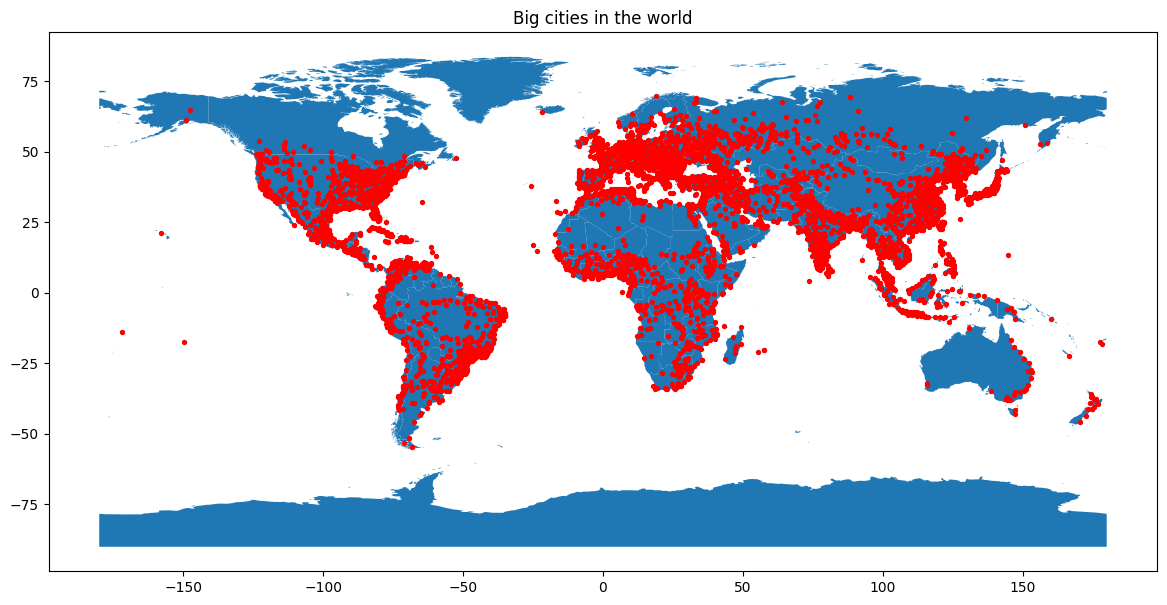

In [35]:
fig, ax = plt.subplots(figsize=(15, 7))

world_gdf.plot(ax=ax)
world_cities.plot(ax=ax, color='red',markersize=8, edgecolor="red")
plt.title("Big cities in the world")

<Axes: >

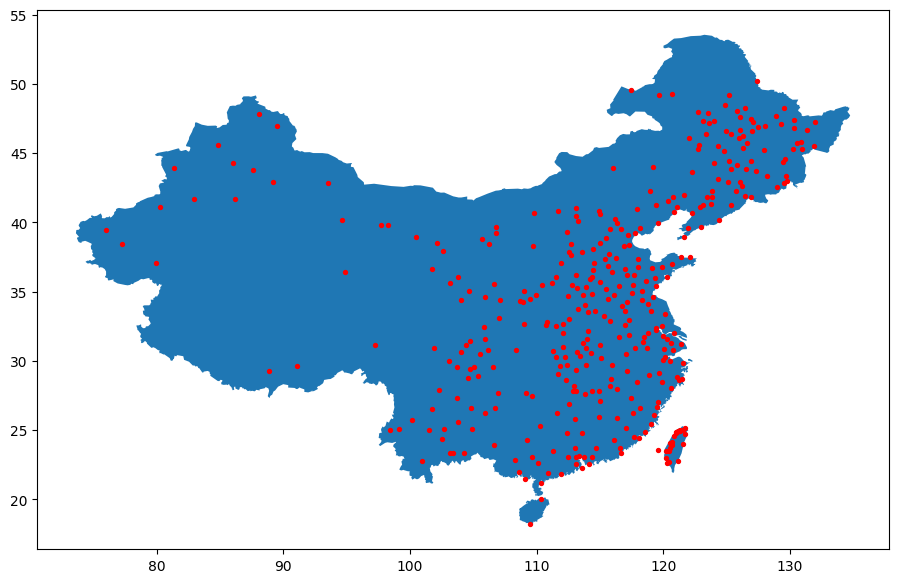

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))

mainland = world_gdf[world_gdf['NAME'] == "China"]
taiwan = world_gdf[world_gdf['NAME'] == "Taiwan"]
mainland_cities = world_cities[world_cities['country'] == "China"]
taiwan_cities =  world_cities[world_cities['country'] == "Taiwan"]

mainland.plot(ax=ax)
taiwan.plot(ax=ax)
mainland_cities.plot(ax=ax,color='red',markersize=8, edgecolor="red")
taiwan_cities.plot(ax=ax,color='red',markersize=8, edgecolor="red")

In [38]:
import folium

m = world_gdf.explore(name="countries")

m = airports.explore(m=m,color="red", name="airport")

folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control
                           
                           
m # show map